In [226]:
import pandas as pd
import numpy as np
#import openpyxl

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report 
from imblearn.combine import SMOTEENN
from PIL import _imaging
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
df = pd.read_csv(r"D:\datasets\telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [229]:
df.drop(columns= ['customerID'], axis=1, inplace=True)

In [230]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [232]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [233]:
df['SeniorCitizen'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.1 KB


In [234]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [235]:
## analyzing 'churn' variable
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [236]:
(df['Churn'].value_counts()/len(df['Churn']))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

as no. of customers who churned are relatively very low than those who did not, it is creating imbalanced data environemnt for mL model to train
therefore, upsampling is required to create a balanced data by producing synthetic data from the existing set 

Text(0, 0.5, 'churn')

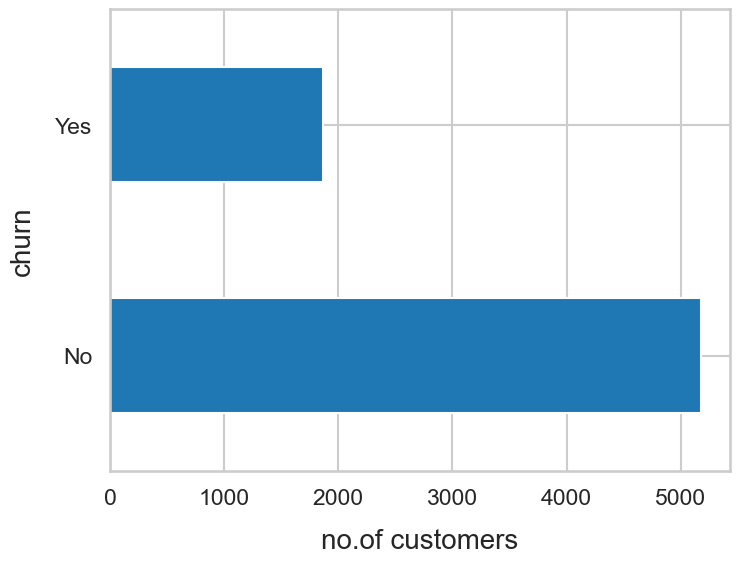

In [237]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("no.of customers", labelpad=14)
plt.ylabel("churn", labelpad=14)

In [238]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [239]:
labels  = ["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]

df['tenure_grouped_months'] = pd.cut(df['tenure'], range(1, 75, 12), right=False, labels=labels)

df['tenure_grouped_months'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_grouped_months, dtype: int64

In [240]:
df.drop(columns= ['tenure'], axis=1, inplace=True)

In [241]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grouped_months
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


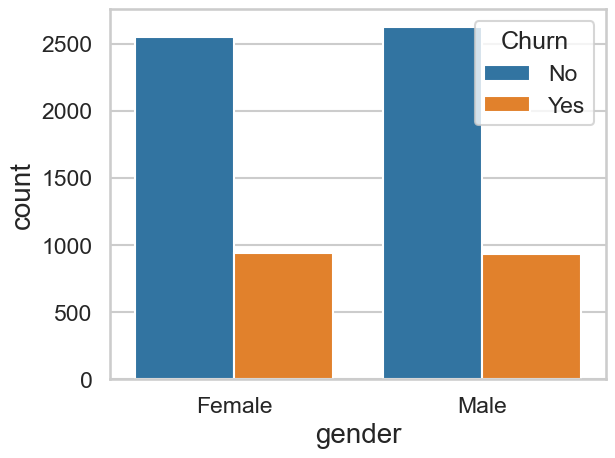

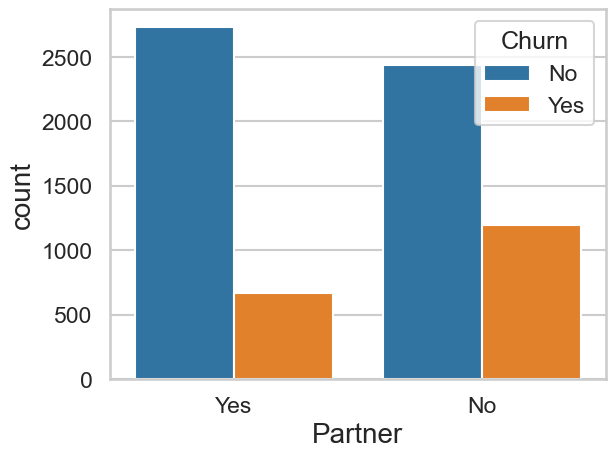

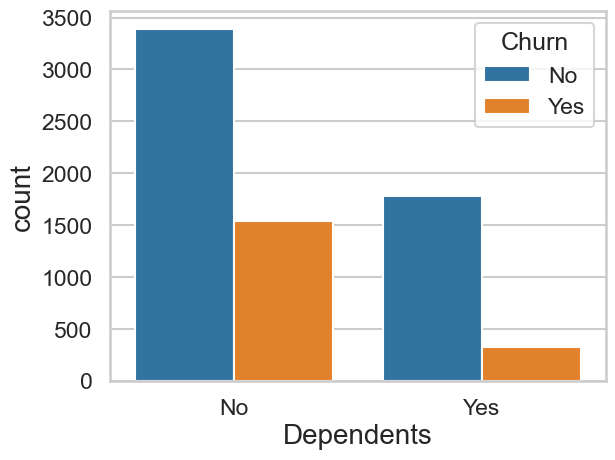

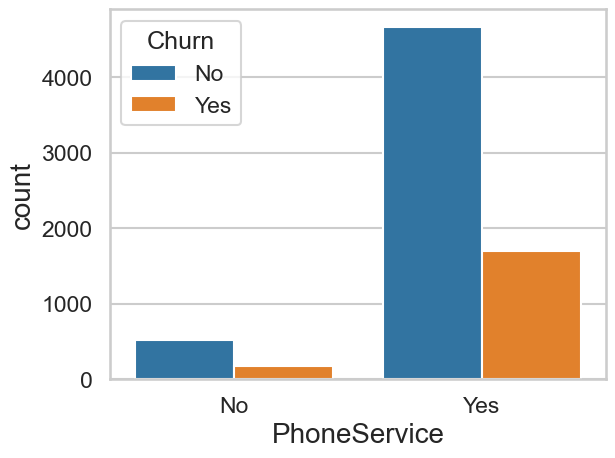

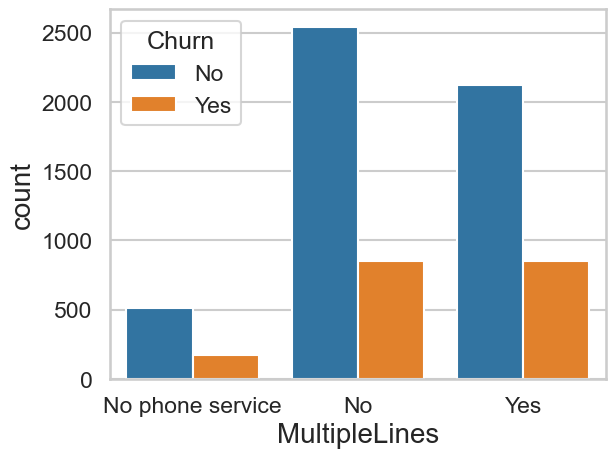

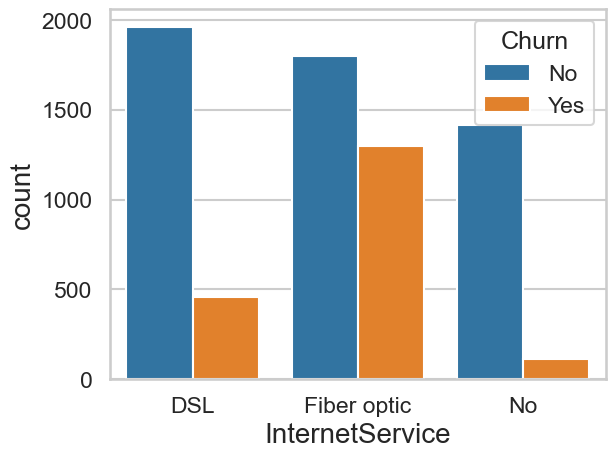

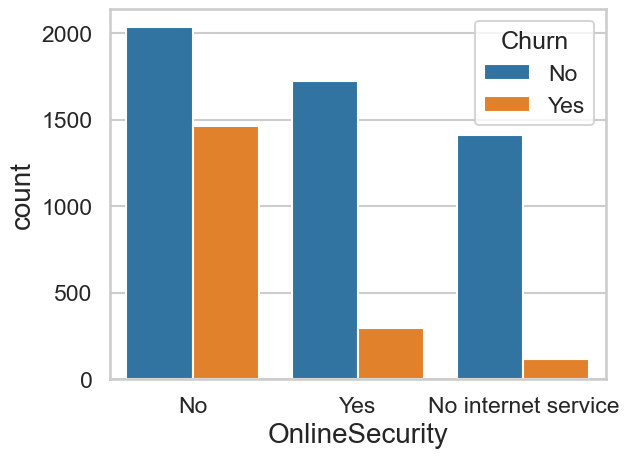

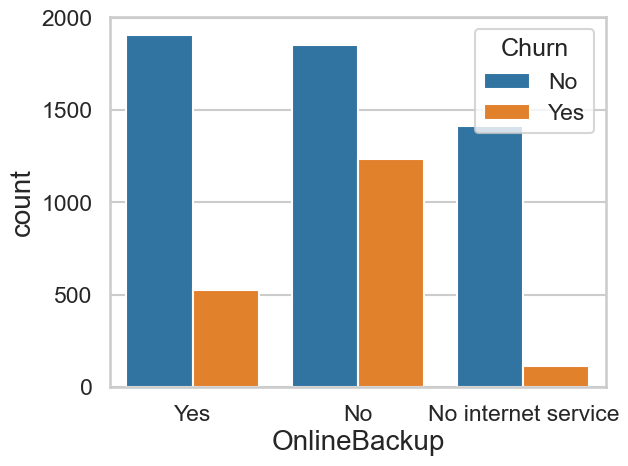

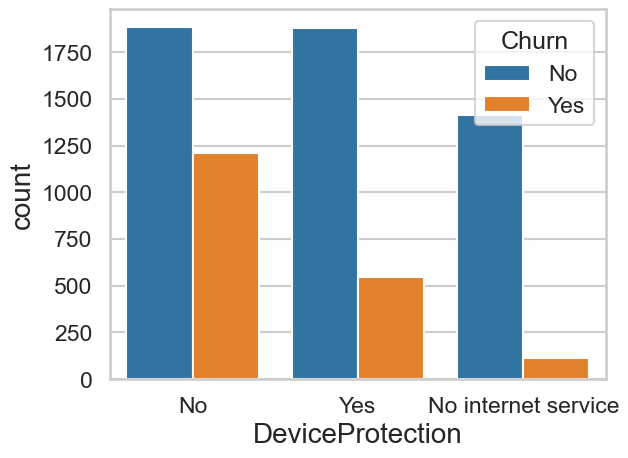

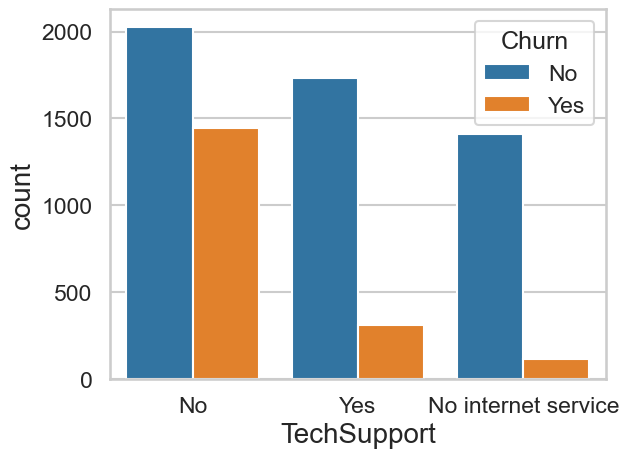

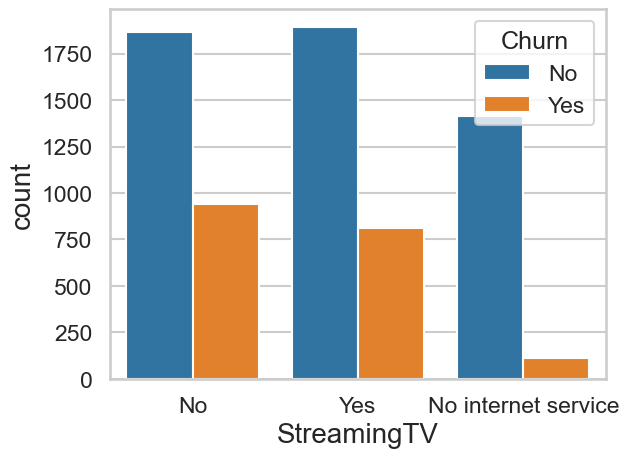

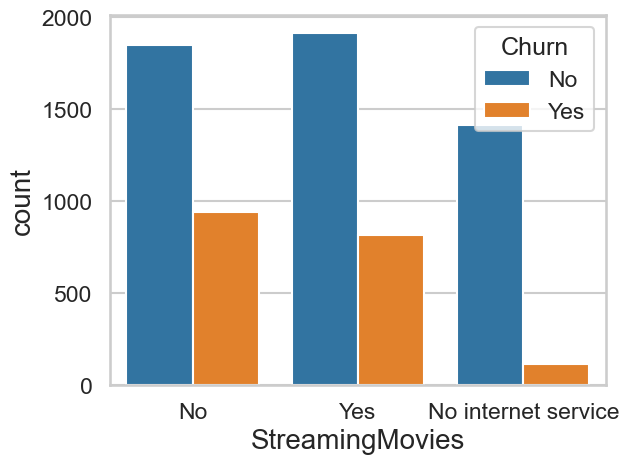

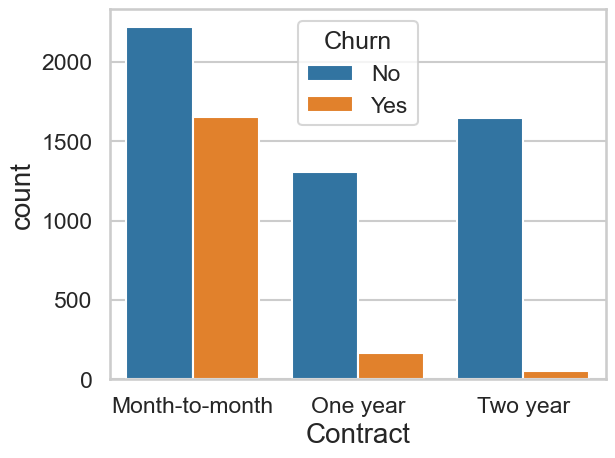

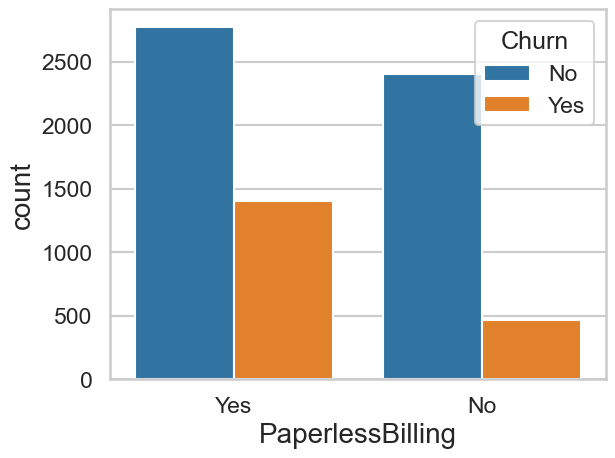

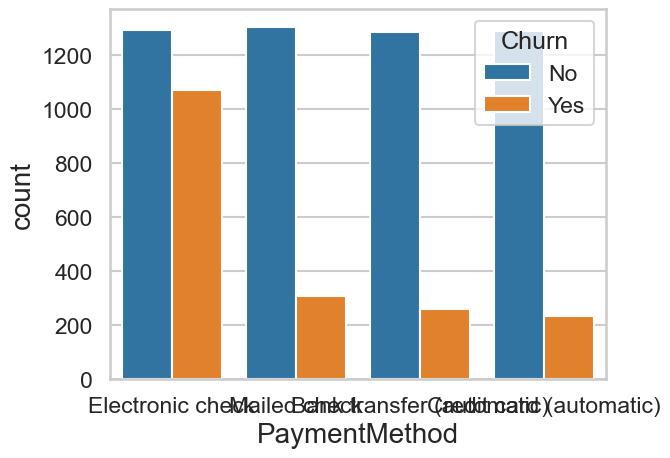

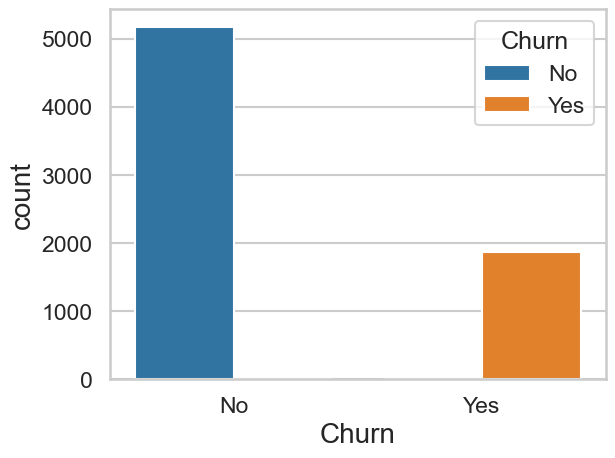

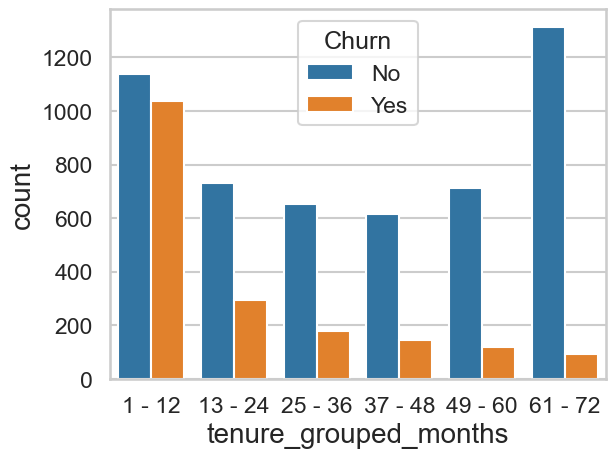

In [242]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    sns.countplot(data=df, x=col, hue='Churn')
    plt.show()

In [243]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [244]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [245]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [246]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [247]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [248]:
#one-hot encoding categorical variables by using pd.get_dummies(); for n categorical variables of a column, n new binary type columns are created
df_dummies = pd.get_dummies(df)

df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grouped_months_1 - 12,tenure_grouped_months_13 - 24,tenure_grouped_months_25 - 36,tenure_grouped_months_37 - 48,tenure_grouped_months_49 - 60,tenure_grouped_months_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


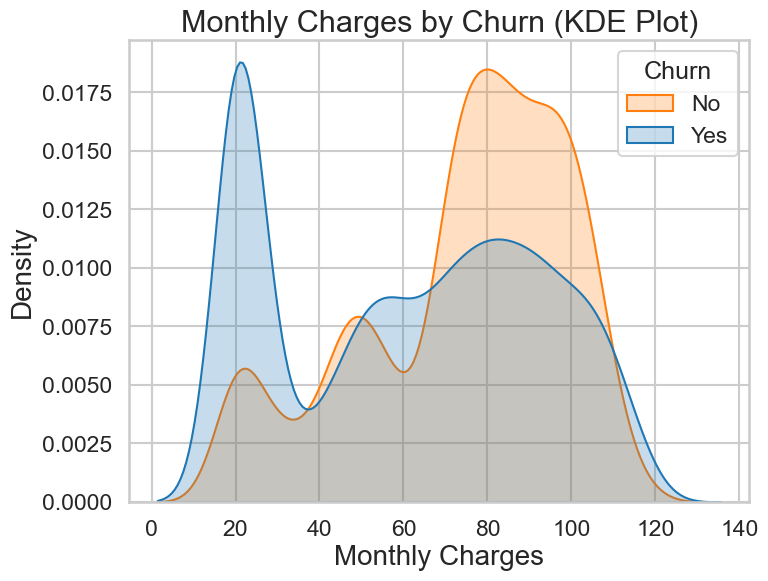

In [249]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Monthly Charges by Churn (KDE Plot)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

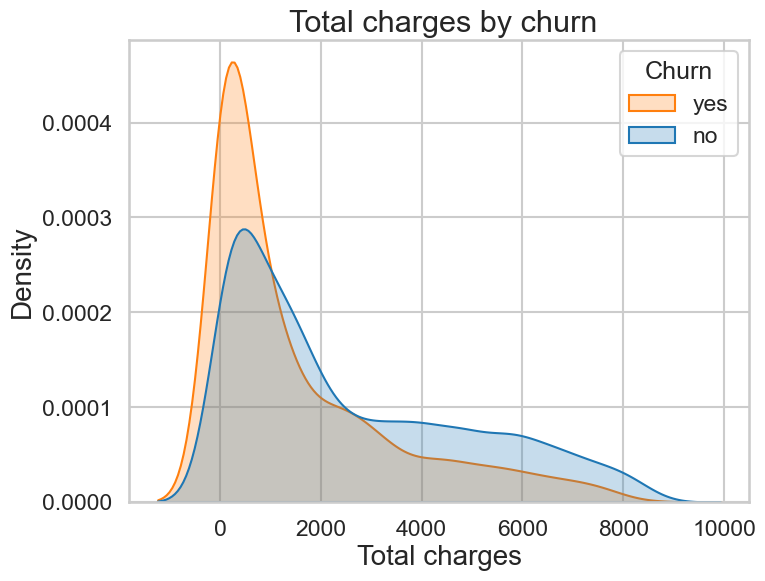

In [250]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False)
plt.xlabel('Total charges')
plt.ylabel('Density')
plt.title(' Total charges by churn')
plt.legend(title='Churn', labels=['yes', 'no'])
plt.show()

<Axes: >

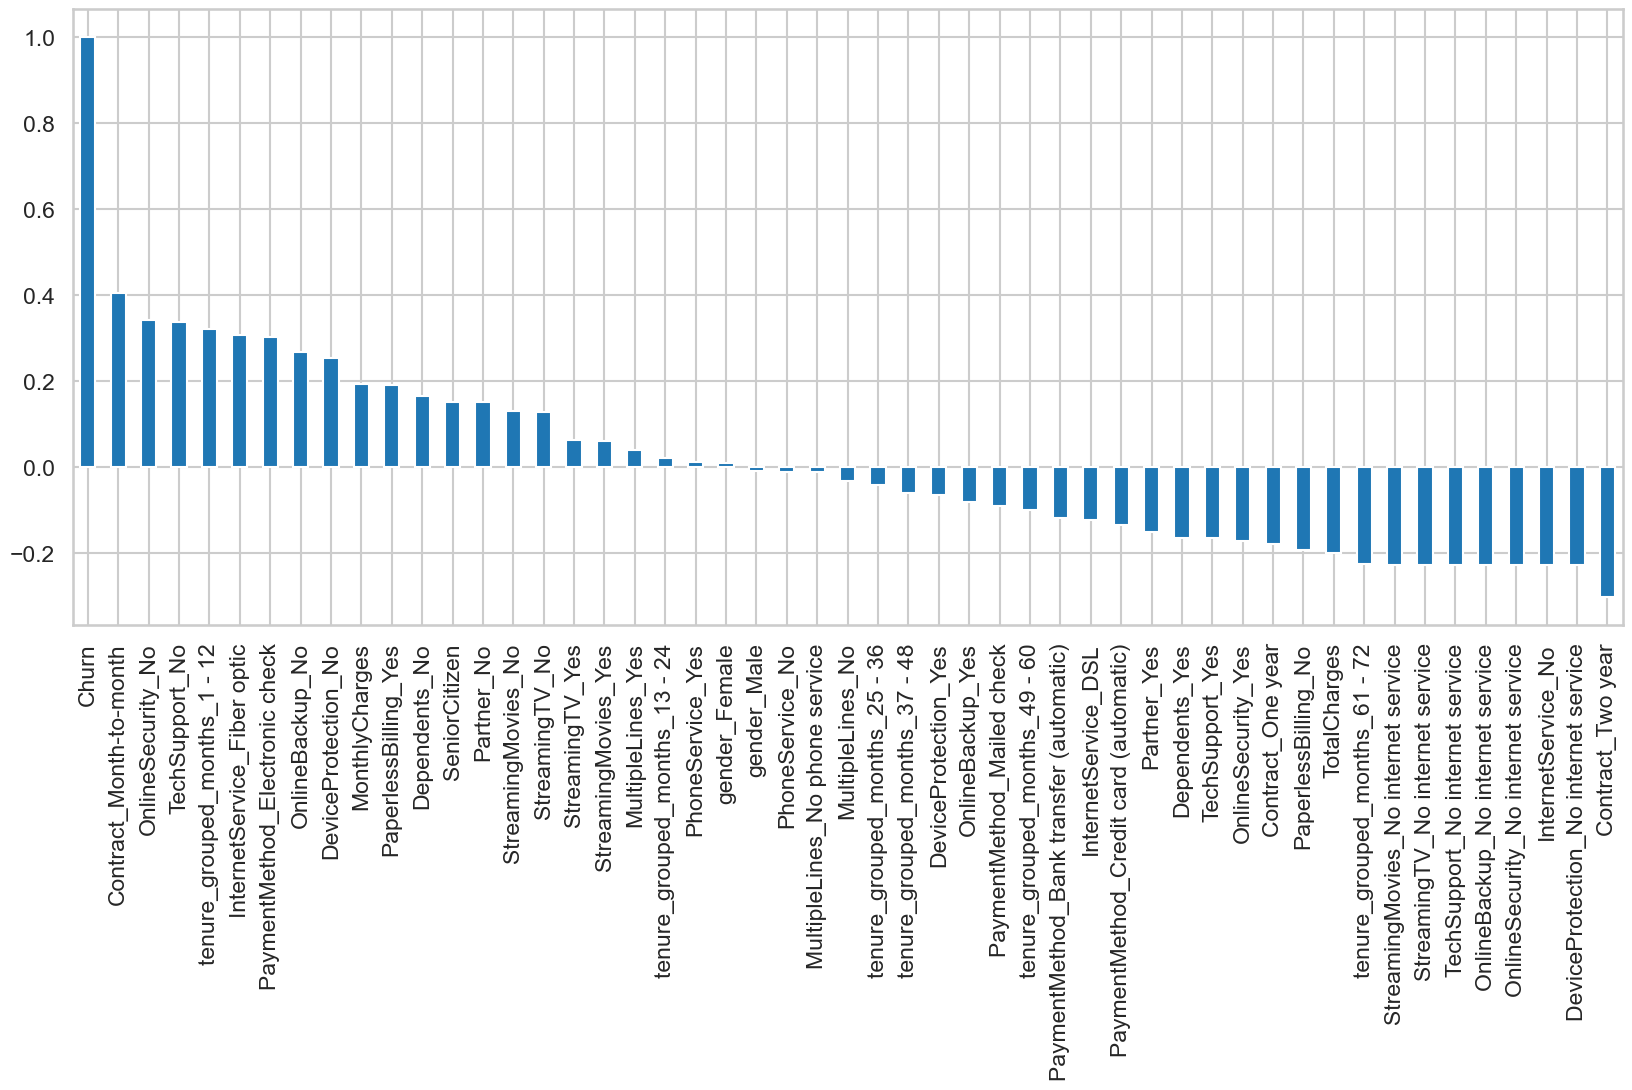

In [251]:
plt.figure(figsize=(20, 8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

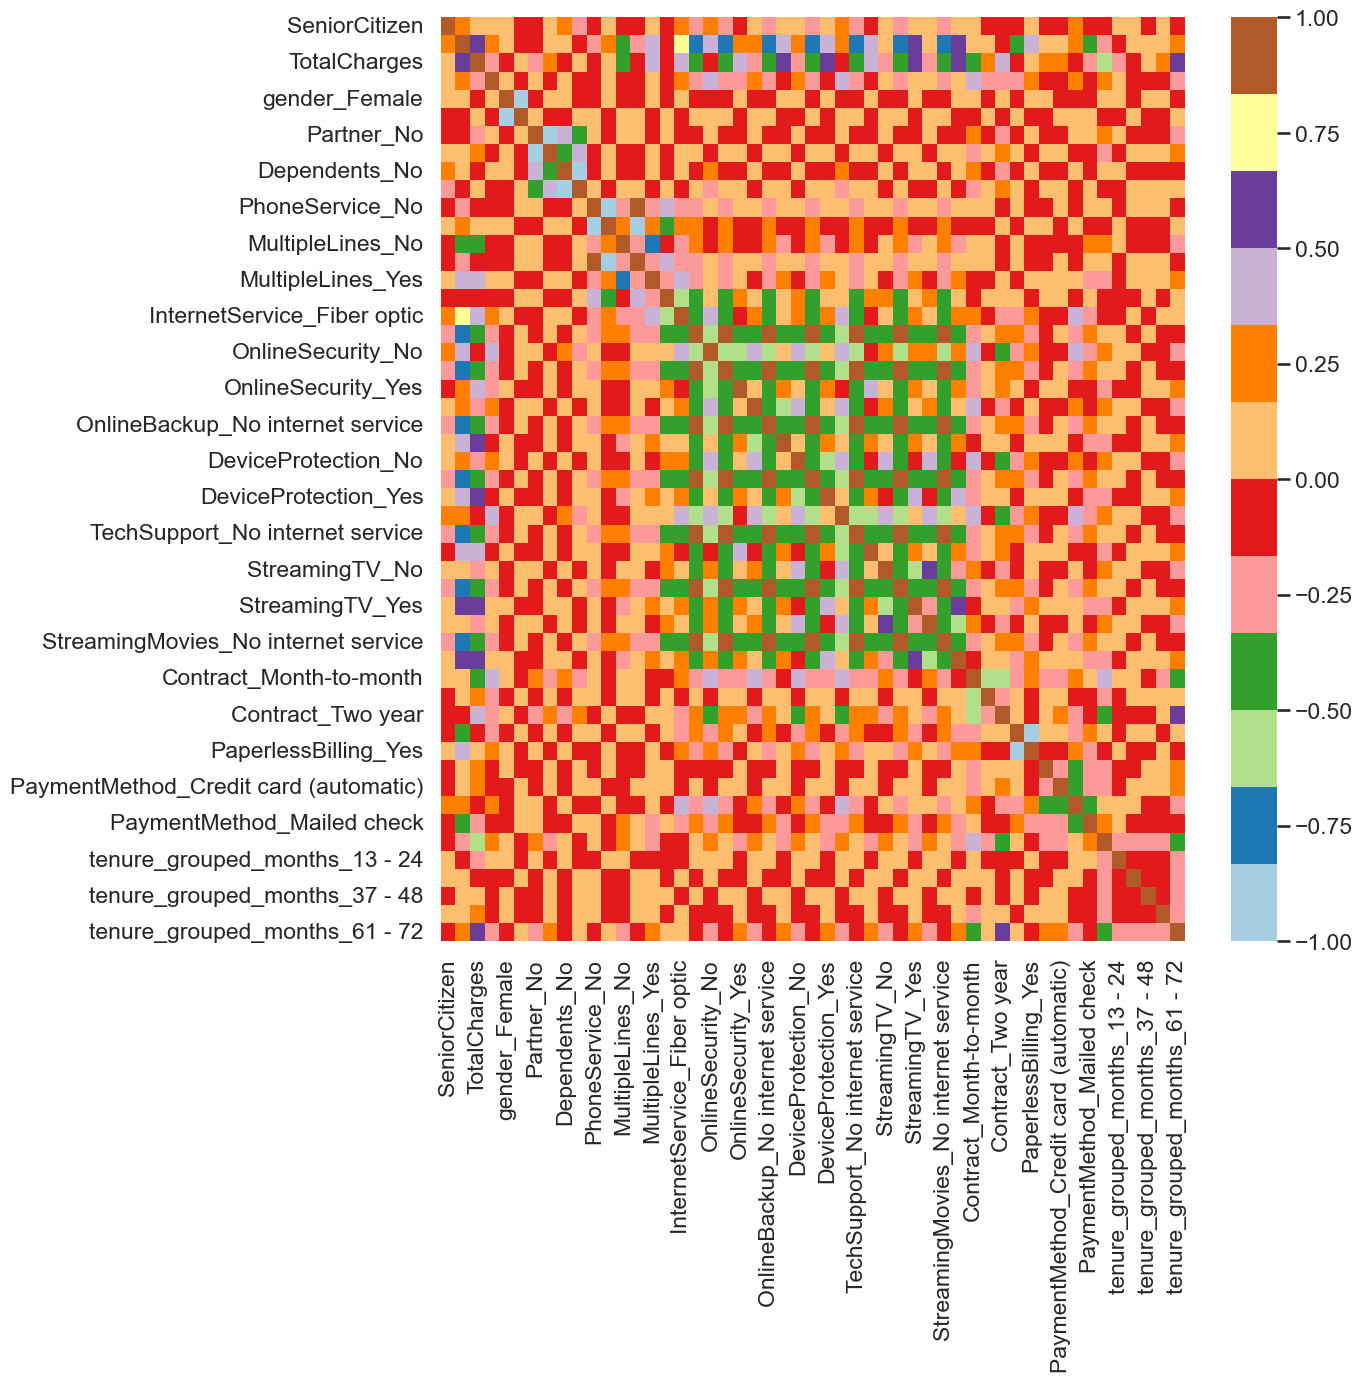

In [252]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

bi-variate analysis

In [253]:
df0_churn0 = df.loc[df['Churn'] == 0]
df1_churn1 = df.loc[df['Churn'] == 1]

In [254]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rc('axes', labelsize=20)
    plt.rc('axes', titlesize=22)

    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright' )

    plt.show()

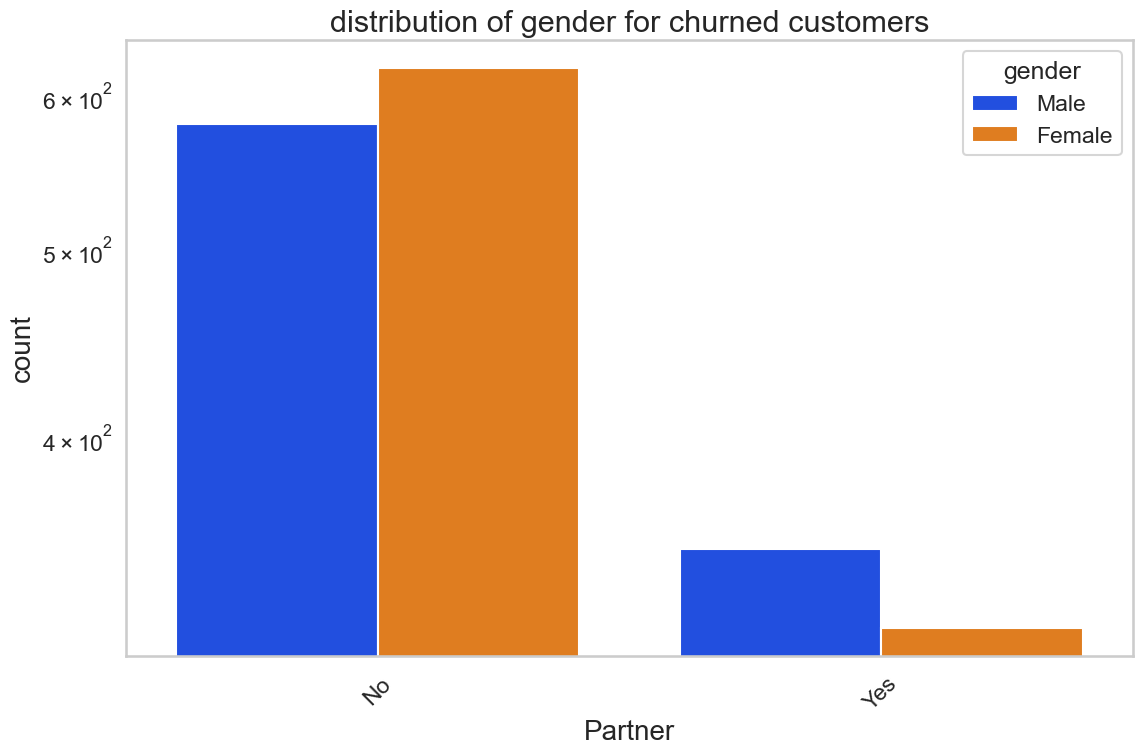

In [255]:
uniplot(df1_churn1, col='Partner', title='distribution of gender for churned customers', hue='gender')

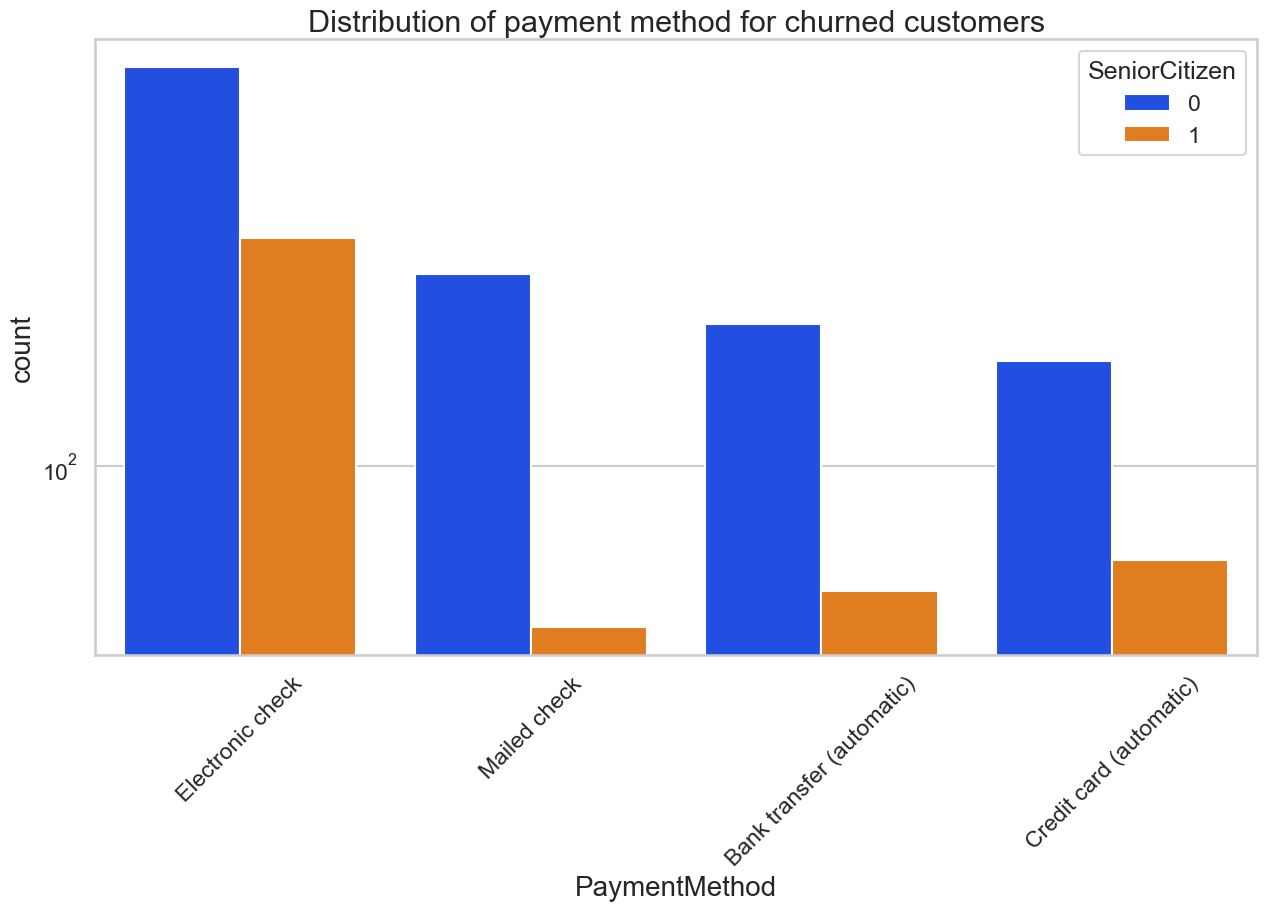

In [256]:
uniplot(df1_churn1, col='PaymentMethod', title='Distribution of payment method for churned customers', hue='SeniorCitizen')

In [257]:
df_dummies.to_csv('tel_churn.csv')

In [258]:
dfm = pd.read_csv('tel_churn.csv')
dfm.shape

(7043, 52)

In [259]:
dfm = dfm.drop('Unnamed: 0', axis=1)

In [260]:
dfm.shape

(7043, 51)

In [261]:
dfm = dfm.dropna()

In [262]:
dfm.shape

(7032, 51)

In [263]:
dfm.head(5)
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   int64  
 5   gender_Male                              7032 non-null   int64  
 6   Partner_No                               7032 non-null   int64  
 7   Partner_Yes                              7032 non-null   int64  
 8   Dependents_No                            7032 non-null   int64  
 9   Dependents_Yes                           7032 non-null   int64  
 10  PhoneService_No                          7032 no

In [264]:
#create x and y variable

X = dfm.drop('Churn', axis=1)
X.shape

(7032, 50)

In [265]:
y = dfm['Churn']
y.shape

(7032,)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [269]:
X_test.shape

(1407, 50)

In [271]:
y_train.shape

(5625,)

In [273]:
y_test.shape

(1407,)

In [276]:
# create decision tree classifier
clf = DecisionTreeClassifier()

In [277]:
#param_grid provides the hyperparameter values that grid search will test to determine the best maximum depth for the Decision Tree. 

param_grid = {'max_depth':[None, 5, 10, 15, 20]}

In [278]:
# create gridsearch object with 5 fold validation and hyperparameter from param_grid to evaluate decision tree 
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [279]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20]},
             scoring='accuracy')

In [292]:
best_max_depth = grid_search.best_params_['max_depth']
print(best_max_depth)

5


In [281]:
# Train the final model with the best maximum depth
final_model = DecisionTreeClassifier(max_depth=best_max_depth)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [282]:
y_pred = final_model.predict(X_test)

In [283]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7690120824449183


In [284]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.63      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.77      1407



In [285]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)

In [286]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2) 

In [287]:
sm_model = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=5, min_samples_leaf=7)

In [288]:
sm_model.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=100)

In [289]:
y_pred_sm = sm_model.predict(xr_test)

In [290]:
print(accuracy_score(yr_test, y_pred_sm))

0.9296610169491526


In [291]:
print(classification_report(yr_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       531
           1       0.93      0.94      0.94       649

    accuracy                           0.93      1180
   macro avg       0.93      0.93      0.93      1180
weighted avg       0.93      0.93      0.93      1180

